Loading and Checking Data
The first step is to import the requires libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

LASIO :  is a library that hass been developed to handle and work with LAS files.

In [2]:
las = lasio.read('15-9-19_SR_COMP.LAS.txt')

In [5]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [6]:
las.sections['Version']

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS Log ASCII Standa"),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth ste")]

In [7]:
las.sections['Well']

[HeaderItem(mnemonic="STRT", unit="M", value="102.1568", descr="Top Depth"),
 HeaderItem(mnemonic="STOP", unit="M", value="4636.514", descr="Bottom Depth"),
 HeaderItem(mnemonic="STEP", unit="M", value="0.1524", descr="Depth Increment"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="Null Value"),
 HeaderItem(mnemonic="FLD", unit="", value="Q15", descr="Field Name"),
 HeaderItem(mnemonic="WELL", unit="", value="15/9-19", descr="NAME"),
 HeaderItem(mnemonic="WBN", unit="", value="15/9-19 SR", descr="WELLBORE"),
 HeaderItem(mnemonic="NATI", unit="", value="NOR", descr="COUNTRY"),
 HeaderItem(mnemonic="CTRY", unit="", value="NOR", descr="COUNTRY"),
 HeaderItem(mnemonic="COMP", unit="", value="STATOIL", descr="OPERATOR"),
 HeaderItem(mnemonic="PDAT", unit="", value="MSL", descr="PERM DATUM"),
 HeaderItem(mnemonic="COUN", unit="", value="NORTH SEA", descr="RIG NAME"),
 HeaderItem(mnemonic="STAT", unit="", value="NORWAY", descr="STATE"),
 HeaderItem(mnemonic="PBWE", unit="", v

After loading the file, we can go further to find and investigate more information about the well. we can do this by creating For loop

In [9]:
for item in las.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}")
 

Top Depth (STRT): 		 102.1568
Bottom Depth (STOP): 		 4636.514
Depth Increment (STEP): 		 0.1524
Null Value (NULL): 		 -999.25
Field Name (FLD): 		 Q15
NAME (WELL): 		 15/9-19
WELLBORE (WBN): 		 15/9-19 SR
COUNTRY (NATI): 		 NOR
COUNTRY (CTRY): 		 NOR
OPERATOR (COMP): 		 STATOIL
PERM DATUM (PDAT): 		 MSL
RIG NAME (COUN): 		 NORTH SEA
STATE (STAT): 		 NORWAY
PB WELL ID (PBWE): 		 15/9-19
PB WELLBORE ID (APIN): 		 15/9-19 SR
PB WELL NAME SET (PBWS): 		 ALL


we can update any entries within the file by the following

In [10]:
las.sections['Well']['CTRY'] ='Norway'

In [11]:
for item in las.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}")

Top Depth (STRT): 		 102.1568
Bottom Depth (STOP): 		 4636.514
Depth Increment (STEP): 		 0.1524
Null Value (NULL): 		 -999.25
Field Name (FLD): 		 Q15
NAME (WELL): 		 15/9-19
WELLBORE (WBN): 		 15/9-19 SR
COUNTRY (NATI): 		 NOR
COUNTRY (CTRY): 		 Norway
OPERATOR (COMP): 		 STATOIL
PERM DATUM (PDAT): 		 MSL
RIG NAME (COUN): 		 NORTH SEA
STATE (STAT): 		 NORWAY
PB WELL ID (PBWE): 		 15/9-19
PB WELLBORE ID (APIN): 		 15/9-19 SR
PB WELL NAME SET (PBWS): 		 ALL


we can use For loop to loop through the curves section to see what the curves mnemonic are present 

In [13]:
for curve in las.curves:
    print(curve.mnemonic)

DEPT
AC
CALI
DEN
GR
NEU
RDEP
RMED


In [14]:
for count, curve in enumerate (las.curves):
    print(f"curve:{curve.mnemonic}, \t unit: {curve.unit},\t Description:{curve.descr}")

curve:DEPT, 	 unit: M,	 Description:1  DEPTH
curve:AC, 	 unit: US/F,	 Description:2  Sonic Transit Time (Slowness)
curve:CALI, 	 unit: IN,	 Description:3  Caliper
curve:DEN, 	 unit: G/CC,	 Description:4  Bulk Density
curve:GR, 	 unit: GAPI,	 Description:5  Gamma Ray
curve:NEU, 	 unit: %,	 Description:6  Neutron Porosity
curve:RDEP, 	 unit: OHMM,	 Description:7  Deep Resistivity
curve:RMED, 	 unit: OHMM,	 Description:8  Medium Resistivity


enumerate function allows us to keep the count of the number of curves that are present within the file

we can remove any curve from the file by using delete method (.delete)

In [16]:
las.delete_curve('RMED')

By repeating the previous code we can see that it's removed

In [17]:
for count, curve in enumerate (las.curves):
    print(f"curve:{curve.mnemonic}, \t unit: {curve.unit},\t Description:{curve.descr}")

curve:DEPT, 	 unit: M,	 Description:1  DEPTH
curve:AC, 	 unit: US/F,	 Description:2  Sonic Transit Time (Slowness)
curve:CALI, 	 unit: IN,	 Description:3  Caliper
curve:DEN, 	 unit: G/CC,	 Description:4  Bulk Density
curve:GR, 	 unit: GAPI,	 Description:5  Gamma Ray
curve:NEU, 	 unit: %,	 Description:6  Neutron Porosity
curve:RDEP, 	 unit: OHMM,	 Description:7  Deep Resistivity


we will convert the LAS file into Dataframe to easily plot data and pass it into one of the many machine learning algorithms

In [18]:
df = las.df()

In [19]:
df.head()

,AC,CALI,DEN,GR,NEU,RDEP
DEPT,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6701 entries, 3615.434 to 4636.514
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      6579 non-null   float64
 1   CALI    6579 non-null   float64
 2   DEN     6656 non-null   float64
 3   GR      6689 non-null   float64
 4   NEU     6668 non-null   float64
 5   RDEP    6701 non-null   float64
dtypes: float64(6)
memory usage: 366.5 KB


In [23]:
df.describe()

,AC,CALI,DEN,GR,NEU,RDEP
count,6579.000000,6579.000000,6656.000000,6689.000000,6668.000000,6701.000000
mean,78.313607,9.550656,2.459291,36.048563,17.986061,3.221012
std,17.009535,0.906267,0.162682,26.705519,11.694084,8.860387
min,1.025100,6.000000,2.037700,2.766100,2.178300,0.250300
25%,66.169300,9.142900,2.341250,14.852300,10.244475,0.800600
50%,74.145900,9.523800,2.514200,32.142600,15.245100,1.770000
75%,89.024250,9.904800,2.589800,50.901700,22.952525,3.394000
max,149.218700,20.285700,3.001300,304.333700,146.347400,198.537100


.info() : function provides information about the data types and number of Null value.
.describe(): function provides statistical information about each curve and can be used as a QC for each curve.

we can  make a quick plot using the plotting function within the pandas. we can plot all curves on a single plot by .plot()

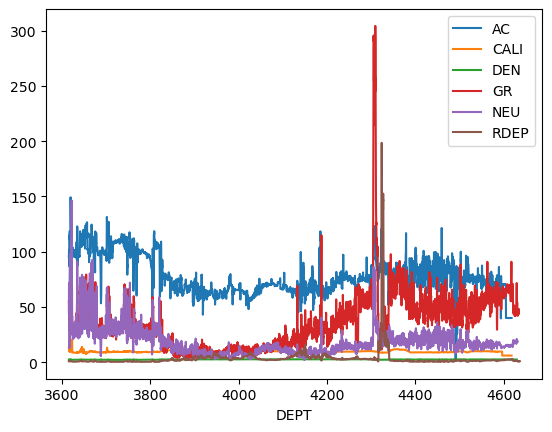

In [25]:
df.plot();

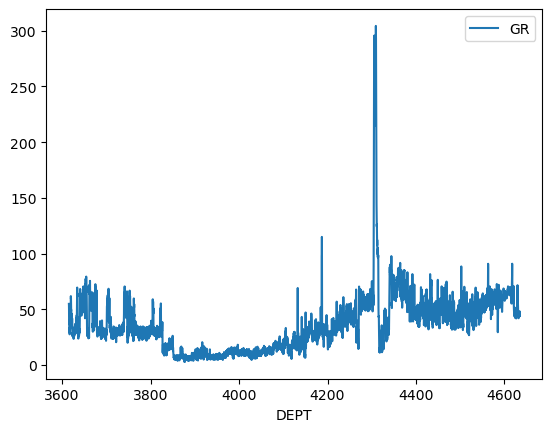

In [27]:
df.plot(y='GR');

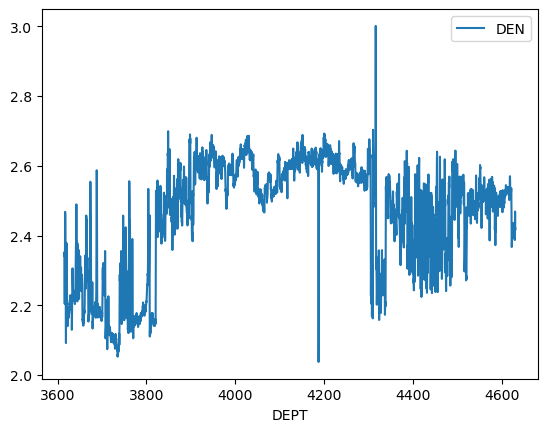

In [28]:
df.plot(y='DEN');